In [1]:
### uncommnet these if this is the first time you use these packages ####
# !pip install pandas
# !pip install numpy
# !pip install scikit-learn
# !pip install seaborn
# !pip install pyod
# !pip install PiML

In [2]:
# mute warnings
import warnings
warnings.filterwarnings('ignore')

import sklearn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats

# Part 1 - Understand the Dataset
## Data set
**We're going to use the Motor Trends Cars ("mtcars") data set that is built into the R programming language.**
```
mpg - Miles per Gallon
cyl - # of cylinders
disp - displacement, in cubic inches
hp - horsepower
drat - driveshaft ratio
wt - weight
qsec - 1/4 mile time; a measure of acceleration
vs - 'V' or straight - engine shape
am - transmission; auto or manual
gear - # of gears
carb - # of carburetors.
```

In [3]:
# Load the dataset
df = pd.read_csv("data/mtcars.csv")
# Here we are going to use the "model" of the car as a the index to our dataframe
df.set_index('model', inplace=True)
df.head()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
model,,,,,,,,,,,
Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [4]:
# Descriptive statistics
df.describe()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
count,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.0000
mean,20.090625,6.187500,230.721875,146.687500,3.596563,3.217250,17.848750,0.437500,0.406250,3.687500,2.8125
std,6.026948,1.785922,123.938694,68.562868,0.534679,0.978457,1.786943,0.504016,0.498991,0.737804,1.6152
min,10.400000,4.000000,71.100000,52.000000,2.760000,1.513000,14.500000,0.000000,0.000000,3.000000,1.0000
25%,15.425000,4.000000,120.825000,96.500000,3.080000,2.581250,16.892500,0.000000,0.000000,3.000000,2.0000
50%,19.200000,6.000000,196.300000,123.000000,3.695000,3.325000,17.710000,0.000000,0.000000,4.000000,2.0000
75%,22.800000,8.000000,326.000000,180.000000,3.920000,3.610000,18.900000,1.000000,1.000000,4.000000,4.0000
max,33.900000,8.000000,472.000000,335.000000,4.930000,5.424000,22.900000,1.000000,1.000000,5.000000,8.0000


In [5]:
# Check whether there are any missing values
df.isnull().sum()

mpg     0
cyl     0
disp    0
hp      0
drat    0
wt      0
qsec    0
vs      0
am      0
gear    0
carb    0
dtype: int64

In [6]:
# Heatmap based on standardized values
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(df)
scaled = scaler.fit_transform(df)
scaled_df = pd.DataFrame(scaled, columns=df.columns, index=df.index)
# scaled_df.abs().sum(axis=1)
df.style.background_gradient(cmap ='coolwarm', gmap=scaled_df, axis=None, vmin=-3, vmax=3)

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
model,,,,,,,,,,,
Mazda RX4,21.000000,6,160.000000,110,3.900000,2.620000,16.460000,0,1,4,4
Mazda RX4 Wag,21.000000,6,160.000000,110,3.900000,2.875000,17.020000,0,1,4,4
Datsun 710,22.800000,4,108.000000,93,3.850000,2.320000,18.610000,1,1,4,1
Hornet 4 Drive,21.400000,6,258.000000,110,3.080000,3.215000,19.440000,1,0,3,1
Hornet Sportabout,18.700000,8,360.000000,175,3.150000,3.440000,17.020000,0,0,3,2
Valiant,18.100000,6,225.000000,105,2.760000,3.460000,20.220000,1,0,3,1
Duster 360,14.300000,8,360.000000,245,3.210000,3.570000,15.840000,0,0,3,4
Merc 240D,24.400000,4,146.700000,62,3.690000,3.190000,20.000000,1,0,4,2
Merc 230,22.800000,4,140.800000,95,3.920000,3.150000,22.900000,1,0,4,2


# Part 2 - Regression
## Use regression models to predict fuel comsumption(mpg)

In [7]:
from sklearn import  linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

#### split the dataset into training and test sets

Note:
- Target variable = mpg
- x = cyl	disp	hp	drat	wt	qsec	vs	am	gear	carb

In [8]:

X_train, X_test, y_train, y_test = train_test_split(
    df.iloc[:,1:], df.iloc[:,0], test_size=0.1, random_state=42)

## 2.1 Linear Regression

In [9]:
# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(X_train, y_train)
print(X_train.columns)
print(regr.coef_)
#Predict using the test set
pred = regr.predict(X_test)

#Calculate the metrics for regression
reg_r2 = r2_score(y_test, pred)
reg_mse = mean_squared_error(y_test, pred)
print('------------')
print(reg_r2, reg_mse)

Index(['cyl', 'disp', 'hp', 'drat', 'wt', 'qsec', 'vs', 'am', 'gear', 'carb'], dtype='object')
[-0.40110818  0.01316612 -0.02167558  0.59836675 -3.83000087  0.70898298
  0.07163707  1.57941842  0.659154    0.0778369 ]
------------
0.8383955580471787 9.935744099588113


In [10]:
# Question 1 

# Using feature importance and sorting values
coefficients = regr.coef_
feature_names = X_train.columns  
coef_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})
coef_df = coef_df.sort_values(by='Coefficient', key=abs, ascending=False)

print(coef_df.head(10))

  Feature  Coefficient
4      wt    -3.830001
7      am     1.579418
5    qsec     0.708983
8    gear     0.659154
3    drat     0.598367
0     cyl    -0.401108
9    carb     0.077837
6      vs     0.071637
2      hp    -0.021676
1    disp     0.013166


## 2.2 SVM for regression

In [12]:
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

In [13]:
# Create svm regression object
regr_svm = make_pipeline(StandardScaler(), SVR(kernel='linear',C=1.0, epsilon=0.2))

# Train the model using the training sets
regr_svm.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svr', SVR(epsilon=0.2, kernel='linear'))])

In [14]:
#Predict using the test set
pred = regr_svm.predict(X_test)

#Calculate the metrics for regression
svm_r2 = r2_score(y_test, pred)
svm_mse = mean_squared_error(y_test, pred)

In [15]:
print(svm_r2, svm_mse)

0.784034144131135 13.27798575479757


## 2.3 Gradient Boosting for regression

In [16]:
from sklearn.ensemble import GradientBoostingRegressor

In [17]:
# Create gradient boosting regression object
reg_gb = GradientBoostingRegressor(random_state=0)

# Train the model using the training sets
reg_gb.fit(X_train, y_train)

GradientBoostingRegressor(random_state=0)

In [18]:
# Question 2
# Using feature importance and sorting
feature_importances = reg_gb.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

print("Top Features in Gradient Boosting Model:")
print(feature_importance_df.head(10))

Top Features in Gradient Boosting Model:
  Feature  Importance
1    disp    0.446771
4      wt    0.254986
0     cyl    0.212251
2      hp    0.073852
9    carb    0.004889
5    qsec    0.004727
3    drat    0.002203
8    gear    0.000133
7      am    0.000096
6      vs    0.000091


In [33]:
#Predict using the test set
pred = reg_gb.predict(X_test)

#Calculate the metrics for regression
gb_r2 = r2_score(y_test, pred)
gb_mse = mean_squared_error(y_test, pred)

In [34]:
#Make a table to compare the performance of different models
pd.DataFrame({'LinearRegression':[reg_r2,reg_mse], 'SVM':[svm_r2, svm_mse],  'GradientBoosting':[gb_r2, gb_mse]}, index=['R2', 'MSE'])

,LinearRegression,SVM,GradientBoosting
R2,0.838396,0.784034,0.880187
MSE,9.935744,13.277986,7.366320


## 3 Outlier Detection: univariate case

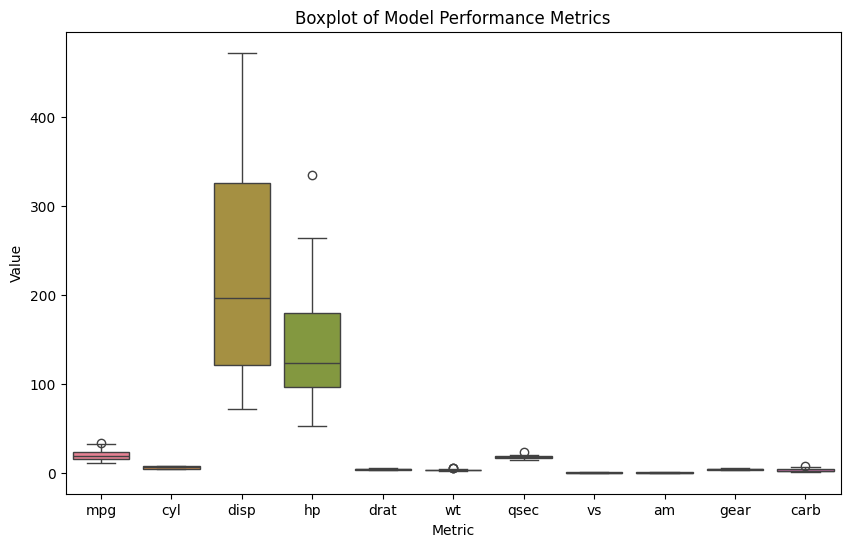

In [35]:
#use sns.boxplot to find univariate outliers
###################################
############ code here ############
###################################

df_copy = df.copy()

plt.figure(figsize=(10, 6))
sns.boxplot(data=df_copy)
plt.title('Boxplot of Model Performance Metrics')
plt.xlabel('Metric')
plt.ylabel('Value')
plt.show()

In [36]:
# Find the outliers for "wt"
wtQ1 = df['wt'].quantile(0.25)
wtQ3 = df['wt'].quantile(0.75)
wtIQR = wtQ3 - wtQ1    #IQR is interquartile range.
print(wtQ1, wtQ3, wtIQR)

wt_upper_limit = (wtQ3 + 1.5 * wtIQR)
wt_lower_limit = (wtQ1 - 1.5 * wtIQR)
# Show the boxplot outliers
df.loc[(df['wt'] < wt_lower_limit) | (df['wt'] > wt_upper_limit)]

2.58125 3.61 1.02875


,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
model,,,,,,,,,,,
Cadillac Fleetwood,10.4,8,472.0,205,2.93,5.250,17.98,0,0,3,4
Lincoln Continental,10.4,8,460.0,215,3.00,5.424,17.82,0,0,3,4
Chrysler Imperial,14.7,8,440.0,230,3.23,5.345,17.42,0,0,3,4


In [37]:
# Find the outliers for "hp" 
###################################
############ code here ############
###################################

# Find the outliers for "hp"
hpQ1 = df['hp'].quantile(0.25)
hpQ3 = df['hp'].quantile(0.75)
hpIQR = hpQ3 - hpQ1    #IQR is interquartile range.
print(hpQ1, hpQ3, hpIQR)

hp_upper_limit = (hpQ3 + 1.5 * hpIQR)
hp_lower_limit = (hpQ1 - 1.5 * hpIQR)
# Show the boxplot outliers
df.loc[(df['hp'] < hp_lower_limit) | (df['hp'] > hp_upper_limit)]

96.5 180.0 83.5


,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
model,,,,,,,,,,,
Maserati Bora,15.0,8,301.0,335,3.54,3.57,14.6,0,1,5,8


In [38]:
# Find the outliers for "qsec"
###################################
############ code here ############
########################

# Find the outliers for qsec
qsecQ1 = df['qsec'].quantile(0.25)
qsecQ3 = df['qsec'].quantile(0.75)
qsecIQR = qsecQ3 - qsecQ1    #IQR is interquartile range.
print(qsecQ1, qsecQ3, qsecIQR)

qsec_upper_limit = (qsecQ3 + 1.5 * qsecIQR)
qsec_lower_limit = (qsecQ1 - 1.5 * qsecIQR)
# Show the boxplot outliers
df.loc[(df['qsec'] < qsec_lower_limit) | (df['qsec'] > qsec_upper_limit)]

16.8925 18.9 2.0075000000000003


,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
model,,,,,,,,,,,
Merc 230,22.8,4,140.8,95,3.92,3.15,22.9,1,0,4,2


In [84]:
df.describe()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
count,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.0000
mean,20.090625,6.187500,230.721875,146.687500,3.596563,3.217250,17.848750,0.437500,0.406250,3.687500,2.8125
std,6.026948,1.785922,123.938694,68.562868,0.534679,0.978457,1.786943,0.504016,0.498991,0.737804,1.6152
min,10.400000,4.000000,71.100000,52.000000,2.760000,1.513000,14.500000,0.000000,0.000000,3.000000,1.0000
25%,15.425000,4.000000,120.825000,96.500000,3.080000,2.581250,16.892500,0.000000,0.000000,3.000000,2.0000
50%,19.200000,6.000000,196.300000,123.000000,3.695000,3.325000,17.710000,0.000000,0.000000,4.000000,2.0000
75%,22.800000,8.000000,326.000000,180.000000,3.920000,3.610000,18.900000,1.000000,1.000000,4.000000,4.0000
max,33.900000,8.000000,472.000000,335.000000,4.930000,5.424000,22.900000,1.000000,1.000000,5.000000,8.0000


## 4 Outlier Treatments

### 4.1 Capping Outliers (using IQR)

In [39]:
df2 = X_train.copy()

In [40]:
# This code will "cap" (or floor) the outliers to our limit for the wt predictor
df2['wt'] = np.where(df2['wt'] > wt_upper_limit,
  wt_upper_limit,
  np.where(
    df2['wt'] < wt_lower_limit,
    wt_lower_limit,
    df2['wt']
   )
)

In [41]:
# Write code to cap/floor the hp predictor
###################################
############ code here ############
###################################

df2['hp'] = np.where(df2['hp'] > hp_upper_limit,
hp_upper_limit,
np.where(
df2['hp'] < hp_lower_limit,
hp_lower_limit,
df2['hp']
)
)

In [42]:
# Write code to cap/floor the qsec predictor
###################################
############ code here ############
###################################

df2['qsec'] = np.where(df2['qsec'] > qsec_upper_limit,
qsec_upper_limit,
np.where(
df2['qsec'] < qsec_lower_limit,
qsec_lower_limit,
df2['qsec']
)
)

In [43]:
# Use describe to ensure our min/max looks right
df2.describe()

,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
count,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000
mean,6.142857,224.978571,144.044643,3.618214,3.158009,17.868973,0.464286,0.392857,3.678571,2.750000
std,1.799471,116.042580,67.338698,0.544066,0.900980,1.733991,0.507875,0.497347,0.722832,1.554563
min,4.000000,71.100000,52.000000,2.760000,1.513000,14.500000,0.000000,0.000000,3.000000,1.000000
25%,4.000000,120.825000,96.500000,3.132500,2.581250,16.892500,0.000000,0.000000,3.000000,2.000000
50%,6.000000,196.300000,118.000000,3.715000,3.325000,17.790000,0.000000,0.000000,4.000000,2.000000
75%,8.000000,307.500000,180.000000,3.920000,3.570000,18.900000,1.000000,1.000000,4.000000,4.000000
max,8.000000,472.000000,305.250000,4.930000,5.153125,21.911250,1.000000,1.000000,5.000000,8.000000


In [44]:
########### Linear Regression ############
regr = linear_model.LinearRegression()
regr.fit(df2, y_train)
pred = regr.predict(X_test)
reg_r2_capped = r2_score(y_test, pred)
reg_mse_capped = mean_squared_error(y_test, pred)

#################### SVM ####################
regr_svm = make_pipeline(StandardScaler(), SVR(kernel='linear',C=1.0, epsilon=0.2))
regr_svm.fit(df2, y_train)
pred = regr_svm.predict(X_test)
svm_r2_capped = r2_score(y_test, pred)
svm_mse_capped = mean_squared_error(y_test, pred)

#################### Gradient Boosting ####################
reg_gb = GradientBoostingRegressor(random_state=0)
reg_gb.fit(df2, y_train)
pred = reg_gb.predict(X_test)
gb_r2_capped = r2_score(y_test, pred)
gb_mse_capped = mean_squared_error(y_test, pred)

In [45]:
# compare metrics: no treatment VS "capped"
pd.DataFrame(
    {'LinearRegression':[reg_r2,reg_r2_capped],
        'SVM':[svm_r2, svm_r2_capped],
        'GradientBoosting':[gb_r2, gb_r2_capped]},
    index=['R2', 'R2_capped'])

,LinearRegression,SVM,GradientBoosting
R2,0.838396,0.784034,0.880187
R2_capped,0.840594,0.780404,0.880187


In [46]:
pd.DataFrame(
    {'LinearRegression':[reg_mse,reg_mse_capped],
     'SVM':[svm_mse, svm_mse_capped],
     'GradientBoosting':[gb_mse, gb_mse_capped]},
    index=['MSE', 'MSE_capped'])

,LinearRegression,SVM,GradientBoosting
MSE,9.935744,13.277986,7.36632
MSE_capped,9.800564,13.501195,7.36632


### Removing rows with outliers

In [47]:
df3 = X_train.copy()

In [48]:
# This code will remove outliers beyond our limit for the wt predictor
y_train.drop(y_train[(df3.wt < wt_lower_limit) | (df3.wt > wt_upper_limit)].index, inplace=True)
df3.drop(df3[df3.wt < wt_lower_limit].index, inplace=True)
df3.drop(df3[df3.wt > wt_upper_limit].index, inplace=True)

In [49]:
# Write code to remove outliers beyond our limit for the hp and qsec predictors
###################################
############ code here ############
###################################

#hp
y_train.drop(y_train[(df3.hp < hp_lower_limit) | (df3.hp > hp_upper_limit)].index, inplace=True)
df3.drop(df3[df3.hp < hp_lower_limit].index, inplace=True)
df3.drop(df3[df3.hp > hp_upper_limit].index, inplace=True)

#qsec
y_train.drop(y_train[(df3.qsec < qsec_lower_limit) | (df3.qsec > qsec_upper_limit)].index, inplace=True)
df3.drop(df3[df3.qsec < qsec_lower_limit].index, inplace=True)
df3.drop(df3[df3.qsec > qsec_upper_limit].index, inplace=True)

In [50]:
#Printing to confirm

print(wt_lower_limit,wt_upper_limit)
print(hp_lower_limit,hp_upper_limit)
print(qsec_lower_limit,qsec_upper_limit)

1.0381249999999997 5.153125
-28.75 305.25
13.881249999999998 21.91125


In [51]:
# Use describe to ensure our min/max looks right
df3.describe()

,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
count,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000
mean,6.000000,206.066667,133.250000,3.653750,2.974917,17.850833,0.500000,0.416667,3.666667,2.458333
std,1.769303,101.054405,59.027812,0.561069,0.751299,1.531319,0.510754,0.503610,0.701964,1.178767
min,4.000000,71.100000,52.000000,2.760000,1.513000,14.500000,0.000000,0.000000,3.000000,1.000000
25%,4.000000,120.250000,96.000000,3.132500,2.428750,16.892500,0.000000,0.000000,3.000000,1.750000
50%,6.000000,167.600000,111.500000,3.750000,3.202500,17.800000,0.500000,0.000000,4.000000,2.000000
75%,8.000000,282.850000,176.250000,3.960000,3.475000,18.900000,1.000000,1.000000,4.000000,4.000000
max,8.000000,360.000000,264.000000,4.930000,4.070000,20.220000,1.000000,1.000000,5.000000,4.000000


In [52]:
# min max and print statements are within limits. 

In [53]:
########### Linear Regression ############
regr = linear_model.LinearRegression()
regr.fit(df3, y_train)
pred = regr.predict(X_test)
reg_r2_removed = r2_score(y_test, pred)
reg_mse_removed = mean_squared_error(y_test, pred)

#################### SVM ####################
regr_svm = make_pipeline(StandardScaler(), SVR(kernel='linear',C=1.0, epsilon=0.2))
regr_svm.fit(df3, y_train)
pred = regr_svm.predict(X_test)
svm_r2_removed = r2_score(y_test, pred)
svm_mse_removed = mean_squared_error(y_test, pred)

#################### Gradient Boosting ####################
reg_gb = GradientBoostingRegressor(random_state=0)
reg_gb.fit(df3, y_train)
pred = reg_gb.predict(X_test)
gb_r2_removed = r2_score(y_test, pred)
gb_mse_removed = mean_squared_error(y_test, pred)

In [54]:
# compare metrics: no treatment VS "capped" VS "removed"
pd.DataFrame(
    {'LinearRegression':[reg_r2,reg_r2_capped,reg_r2_removed],
        'SVM':[svm_r2, svm_r2_capped, svm_r2_removed],
        'GradientBoosting':[gb_r2, gb_r2_capped, gb_r2_removed]},
    index=['R2', 'R2_capped', 'R2_removed'])

,LinearRegression,SVM,GradientBoosting
R2,0.838396,0.784034,0.880187
R2_capped,0.840594,0.780404,0.880187
R2_removed,0.714471,0.782641,0.722095


In [55]:
pd.DataFrame(
    {'LinearRegression':[reg_mse,reg_mse_capped,reg_mse_removed],
     'SVM':[svm_mse, svm_mse_capped, svm_mse_removed],
     'GradientBoosting':[gb_mse, gb_mse_capped, gb_mse_removed]},
    index=['MSE', 'MSE_capped', 'MSE_removed'])

,LinearRegression,SVM,GradientBoosting
MSE,9.935744,13.277986,7.366320
MSE_capped,9.800564,13.501195,7.366320
MSE_removed,17.554841,13.363656,17.086114


## Outlier Detection: multivariate case

In [56]:
# If not already installed, install pyod
#!pip install pyod

In [60]:
# use LOF (with 5 nearest neighbors) to detection multivariate outliers
# and eliminate rows with and lof score > 1.3
from pyod.models.lof import LOF

#df4 = df.copy()
###################################
############ code here ############
###################################

# Create a deep copy of the DataFrame = avoids side effects
df4 = df.copy(deep = True)
lof = LOF(n_neighbors=5)
lof.fit(df4)
lof_scores = lof.decision_function(df4)

lof_scores_df = pd.Series(lof_scores, index = df4.index, name = 'LOF_Score')
print(lof_scores_df)
threshold = 1.3
df_drop_outliers = df4[lof_scores_df <= threshold]
print(df_drop_outliers)

model
Mazda RX4              1.009669
Mazda RX4 Wag          1.009669
Datsun 710             1.019410
Hornet 4 Drive         1.018802
Hornet Sportabout      0.898130
Valiant                1.311407
Duster 360             0.963273
Merc 240D              1.214504
Merc 230               0.894883
Merc 280               1.078968
Merc 280C              1.079406
Merc 450SE             0.982501
Merc 450SL             0.982501
Merc 450SLC            0.982501
Cadillac Fleetwood     1.119239
Lincoln Continental    1.053447
Chrysler Imperial      1.005173
Fiat 128               1.073147
Honda Civic            1.123344
Toyota Corolla         1.101535
Toyota Corona          0.882824
Dodge Challenger       0.958595
AMC Javelin            0.982501
Camaro Z28             0.975802
Pontiac Firebird       1.020847
Fiat X1-9              1.068408
Porsche 914-2          0.882824
Lotus Europa           1.019410
Ford Pantera L         1.128545
Ferrari Dino           1.420831
Maserati Bora          1.395970
Vo

In [61]:
# Rebuild the models

X_train_lof, X_test_lof, y_train_lof, y_test_lof = train_test_split(
df_drop_outliers.iloc[:,1:], df_drop_outliers.iloc[:,0], test_size=0.1,random_state=42)

########### Linear Regression ############
regr = linear_model.LinearRegression()
regr.fit(X_train_lof, y_train_lof)
pred = regr.predict(X_test)
reg_r2_removed_lof = r2_score(y_test, pred)
reg_mse_removed_lof = mean_squared_error(y_test, pred)

#################### SVM ####################
regr_svm = make_pipeline(StandardScaler(), SVR(kernel='linear',C=1.0, epsilon=0.2))
regr_svm.fit(X_train_lof, y_train_lof)
pred = regr_svm.predict(X_test)
svm_r2_removed_lof = r2_score(y_test, pred)
svm_mse_removed_lof = mean_squared_error(y_test, pred)

#################### Gradient Boosting ####################
reg_gb = GradientBoostingRegressor(random_state=0)
reg_gb.fit(X_train_lof, y_train_lof)
pred = reg_gb.predict(X_test)
gb_r2_removed_lof = r2_score(y_test, pred)
gb_mse_removed_lof = mean_squared_error(y_test, pred)

In [62]:
# compare metrics: no treatment VS "capped" VS "removed"
pd.DataFrame(
    {'LinearRegression':[reg_r2,reg_r2_capped,reg_r2_removed,reg_r2_removed_lof],
        'SVM':[svm_r2, svm_r2_capped, svm_r2_removed, svm_r2_removed_lof],
        'GradientBoosting':[gb_r2, gb_r2_capped, gb_r2_removed, gb_r2_removed_lof]},
    index=['R2', 'R2_capped', 'R2_removed', 'R2_removed_lof'])

,LinearRegression,SVM,GradientBoosting
R2,0.838396,0.784034,0.880187
R2_capped,0.840594,0.780404,0.880187
R2_removed,0.714471,0.782641,0.722095
R2_removed_lof,0.891588,0.860716,0.884177


In [63]:
pd.DataFrame(
    {'LinearRegression':[reg_mse,reg_mse_capped,reg_mse_removed,reg_mse_removed_lof],
     'SVM':[svm_mse, svm_mse_capped, svm_mse_removed, svm_mse_removed_lof],
     'GradientBoosting':[gb_mse, gb_mse_capped, gb_mse_removed, gb_mse_removed_lof]},
    index=['MSE', 'MSE_capped', 'MSE_removed', 'MSE_removed_lof'])

,LinearRegression,SVM,GradientBoosting
MSE,9.935744,13.277986,7.366320
MSE_capped,9.800564,13.501195,7.366320
MSE_removed,17.554841,13.363656,17.086114
MSE_removed_lof,6.665388,8.563416,7.121020


# Q1. What were the top 4 most influential features in the `regr` model above?


The top 4 most influential features in models:

Regr Model: 
- wt -3.8300
- am 1.5794
- qsec 0.7089
- gear 0.6591

Regr LOF Model:
- wt    -3.747085
- gear     2.900710
- drat     2.150093
- am     2.057209

In [11]:
 # 2.1 Regression 

# Using feature importance and sorting values
coefficients = regr.coef_
feature_names = X_train.columns  
coef_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})
coef_df = coef_df.sort_values(by='Coefficient', key=abs, ascending=False)

print(coef_df.head(10))

  Feature  Coefficient
4      wt    -3.830001
7      am     1.579418
5    qsec     0.708983
8    gear     0.659154
3    drat     0.598367
0     cyl    -0.401108
9    carb     0.077837
6      vs     0.071637
2      hp    -0.021676
1    disp     0.013166


In [64]:
# Feature importance of LOF regr
coefficients = regr.coef_
feature_names = X_train_lof.columns  
coef_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})
coef_df = coef_df.sort_values(by='Coefficient', key=abs, ascending=False)
print(coef_df.head(10))

  Feature  Coefficient
4      wt    -3.747085
8    gear     2.900710
3    drat     2.150093
7      am     2.057209
6      vs     1.240358
0     cyl     1.025623
9    carb    -0.997821
5    qsec     0.992931
1    disp     0.016548
2      hp    -0.011001


# Q2. What was the most influential features in the `regr` model above?  What was the most influential feature in the `reg_gb` model above?


The most influential feature in regr model is wt (regr = -3.8, regr_lof = -3.7)

The most influential feature in reg_gb model is disp (reg_gb = 0.45)

In [19]:
# 2.3 Regression GB

# Using feature importance and sorting
feature_importances = reg_gb.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

print("Top Features in Gradient Boosting Model:")
print(feature_importance_df.head(10))

Top Features in Gradient Boosting Model:
  Feature  Importance
1    disp    0.446771
4      wt    0.254986
0     cyl    0.212251
2      hp    0.073852
9    carb    0.004889
5    qsec    0.004727
3    drat    0.002203
8    gear    0.000133
7      am    0.000096
6      vs    0.000091


In [66]:
# Feature importance for reg_gb LOF

feature_importances = reg_gb.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': X_train_lof.columns, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

print("Top Features in Gradient Boosting Model:")
print(feature_importance_df.head(10))

Top Features in Gradient Boosting Model:
  Feature    Importance
2      hp  5.328020e-01
4      wt  3.132821e-01
1    disp  1.024302e-01
0     cyl  2.792371e-02
5    qsec  1.168440e-02
3    drat  9.824976e-03
9    carb  1.925580e-03
6      vs  1.092299e-04
7      am  1.768141e-05
8    gear  1.156508e-07


# Q3. In the original data set (`df`) which car looks more like a *bivariate outlier* with respect to `disp` and `drat`?  *Masarati Bora*, *Ford Pantera L*, or the *Toyota Corolla*?

Based on the scatter plot, the Maserati Bora appears to be the bivariate outlier with respect to disp (displacement) and drat (rear axle ratio).

The Maserati Bora has a displacement around 300 cubic inches, which is significantly larger than the other two cars.
The Maserati Bora has a drat around 3.5, which is also notably different from the Toyota Corolla (around 4.2) and the Ford Pantera L (around 3.6).

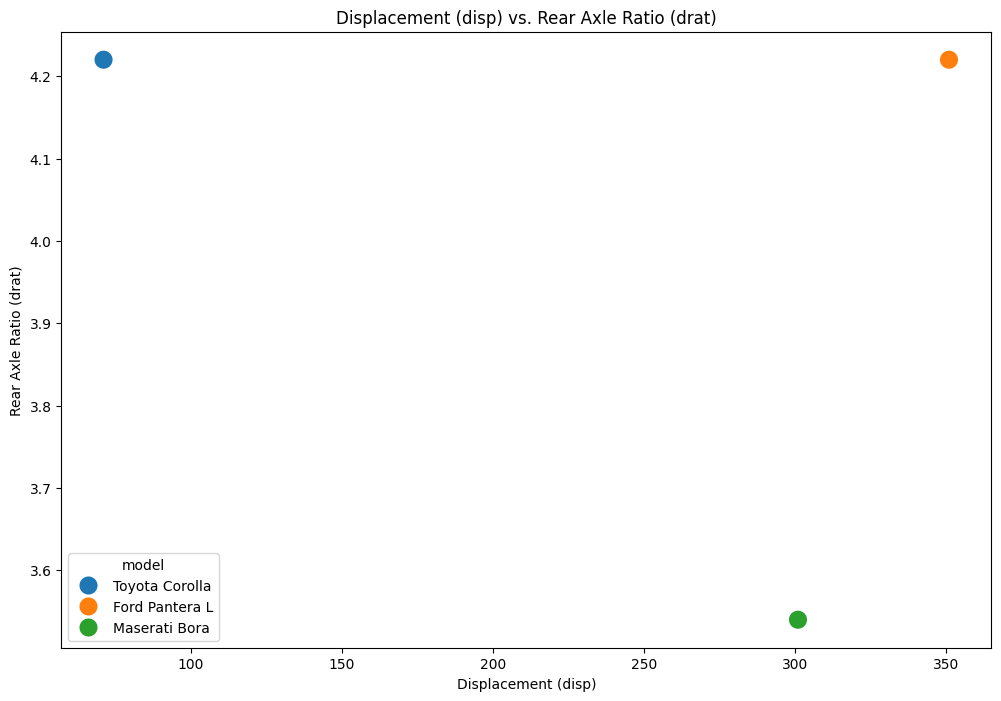

In [67]:
df_subset = df[df.index.isin(['Maserati Bora', 'Ford Pantera L', 'Toyota Corolla'])]

plt.figure(figsize=(12, 8))  
sns.scatterplot(x='disp', y='drat', data=df_subset, hue='model', s=200) 
plt.title('Displacement (disp) vs. Rear Axle Ratio (drat)')
plt.xlabel('Displacement (disp)')
plt.ylabel('Rear Axle Ratio (drat)')
plt.show()

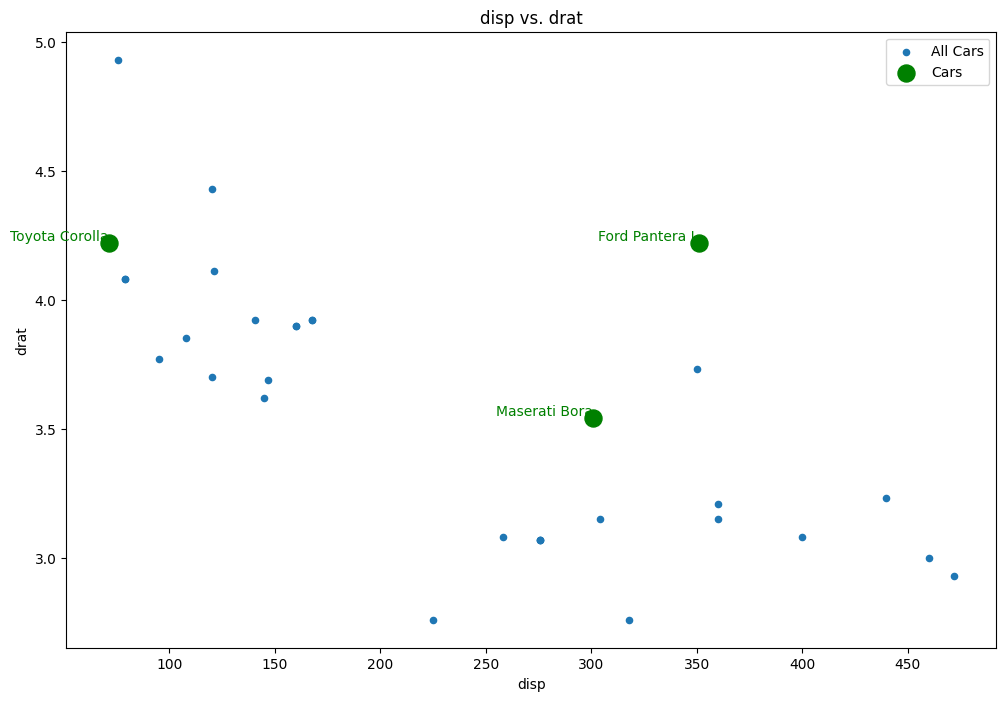

In [71]:
plt.figure(figsize=(12, 8))  # Adjust figure size if needed

# Plot all data points
plt.scatter(df['disp'], df['drat'], label='All Cars', s=20) 

# Cars of interest
cars = ['Maserati Bora', 'Ford Pantera L', 'Toyota Corolla']
highlight = df.loc[cars]
plt.scatter(highlight['disp'], highlight['drat'], color='green', label='Cars', s=150)  

# Annotate cars of interest
for car in cars:
    x = df.loc[car, 'disp']
    y = df.loc[car, 'drat']
    plt.annotate(car, (x, y), color='green', fontsize=10, ha='right', va='bottom')


plt.xlabel('disp')
plt.ylabel('drat')
plt.title('disp vs. drat')
plt.legend()
plt.show()

# Q4. Could the `scipy.stats.mstats.winsorize` function in Python be used to easily treat *only* the outliers we found with `sns.boxplot`?  Explain.


No, winsorization won't directly treat only outliers found in a boxplot. It's for limiting extreme values, not specifically targeting outliers identified by the 1.5*IQR rule used in boxplots. You'll need to examine those outliers and decide how to handle them based on their context therefore i wouldn't use this approach.
The outliers identified by sns.boxplot are visually determined based on the boxplot's whiskers. This visual identification doesn't directly correspond to a fixed percentile.

# Q5. How does the "capping" the outliers affect model performance?  What happens if you change the `random_state` to 43 in the train/test split (and then re-build the models)?  What could be done to provide more robust error metrics?


Capping Outliers:
- Reduces outlier influence, improving model stability and potentially preventing overfitting.
- Can lead to information loss and model bias if outliers are not truly erroneous.
- In the below code we can see that R2 increase and MSE decreases when capping occurs. Although this is good it is not a very significant change (R2 0.83 --> 0.84, MSE 9.93 -->9.97)

Changing random_state:
- Alters the train-test split, potentially causing small variations in model performance due to different data subsets. Even a small change in the seed (from 42 to 43) can shift the random selection of data points, resulting in a slightly different mix of samples in each set.

Robust Error Metrics:
- K-Fold Cross-Validation provides a more stable estimate of performance by training and testing on different folds of the data.
- Bootstrapping estimates model performance variability by repeatedly sampling data with replacement
- Use multiple test train splits and calculate outlier treatment vs no treatment
- Calculate MSE and R2 for every iteration any changes are made and compute the differences.

In [75]:
r2_cap = pd.DataFrame(
    {'LinearRegression':[reg_r2,reg_r2_capped],
        'SVM':[svm_r2, svm_r2_capped],
        'GradientBoosting':[gb_r2, gb_r2_capped]},
    index=['R2', 'R2_capped'])

mse_cap = pd.DataFrame(
    {'LinearRegression':[reg_mse,reg_mse_capped],
     'SVM':[svm_mse, svm_mse_capped],
     'GradientBoosting':[gb_mse, gb_mse_capped]},
    index=['MSE', 'MSE_capped'])

print(r2_cap)
print("-----------------------------------------------------------")
print(mse_cap)

           LinearRegression       SVM  GradientBoosting
R2                 0.838396  0.784034          0.880187
R2_capped          0.840594  0.780404          0.880187
-----------------------------------------------------------
            LinearRegression        SVM  GradientBoosting
MSE                 9.935744  13.277986           7.36632
MSE_capped          9.800564  13.501195           7.36632


# Q6. *On average (given many different train/test splits)*, what modeling method is most affected by the removal of outliers in this data set?  Why?


On average, linear regression is most affected by the removal of outliers in the mtcars dataset. 

- Linear regression models are sensitive to outliers. 
- Outliers can exert a strong influence on the calculated regression line, which can lead to inaccurate predictions, especially if there's a strong linear relationship between the outlier and the target variable.

- Gradient Boosting models are more robust to outliers, especially those based on decision trees. 
- They are less likely to be significantly affected by extreme values in the data. 
- Support Vector Machines (SVM) are also relatively robust, especially with linear kernels.

In [76]:
r2 = pd.DataFrame(
    {'LinearRegression':[reg_r2,reg_r2_capped,reg_r2_removed,reg_r2_removed_lof],
        'SVM':[svm_r2, svm_r2_capped, svm_r2_removed, svm_r2_removed_lof],
        'GradientBoosting':[gb_r2, gb_r2_capped, gb_r2_removed, gb_r2_removed_lof]},
    index=['R2', 'R2_capped', 'R2_removed', 'R2_removed_lof'])
mse = pd.DataFrame(
    {'LinearRegression':[reg_mse,reg_mse_capped,reg_mse_removed,reg_mse_removed_lof],
     'SVM':[svm_mse, svm_mse_capped, svm_mse_removed, svm_mse_removed_lof],
     'GradientBoosting':[gb_mse, gb_mse_capped, gb_mse_removed, gb_mse_removed_lof]},
    index=['MSE', 'MSE_capped', 'MSE_removed', 'MSE_removed_lof'])

print(r2)
print('---------------------------------------------------------------')
print(mse)

                LinearRegression       SVM  GradientBoosting
R2                      0.838396  0.784034          0.880187
R2_capped               0.840594  0.780404          0.880187
R2_removed              0.714471  0.782641          0.722095
R2_removed_lof          0.891588  0.860716          0.884177
---------------------------------------------------------------
                 LinearRegression        SVM  GradientBoosting
MSE                      9.935744  13.277986          7.366320
MSE_capped               9.800564  13.501195          7.366320
MSE_removed             17.554841  13.363656         17.086114
MSE_removed_lof          6.665388   8.563416          7.121020


# Q7. What car has the 4th highest LOF value?  What attributes of this car showed up as univariate outliers according to our boxplots (IQR * 1.5 method)?


The car with the 4th highest LOF value is Honda Civic (LOF = 1.23)
- None of the attributes of this car showed up as univariate outliers in the boxplot method.
- wt, hp, qsec are all within range for this car (checked min and max)

In [83]:
df.loc['Honda Civic']

mpg     30.400
cyl      4.000
disp    75.700
hp      52.000
drat     4.930
wt       1.615
qsec    18.520
vs       1.000
am       1.000
gear     4.000
carb     2.000
Name: Honda Civic, dtype: float64

In [85]:
df.describe()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
count,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.0000
mean,20.090625,6.187500,230.721875,146.687500,3.596563,3.217250,17.848750,0.437500,0.406250,3.687500,2.8125
std,6.026948,1.785922,123.938694,68.562868,0.534679,0.978457,1.786943,0.504016,0.498991,0.737804,1.6152
min,10.400000,4.000000,71.100000,52.000000,2.760000,1.513000,14.500000,0.000000,0.000000,3.000000,1.0000
25%,15.425000,4.000000,120.825000,96.500000,3.080000,2.581250,16.892500,0.000000,0.000000,3.000000,2.0000
50%,19.200000,6.000000,196.300000,123.000000,3.695000,3.325000,17.710000,0.000000,0.000000,4.000000,2.0000
75%,22.800000,8.000000,326.000000,180.000000,3.920000,3.610000,18.900000,1.000000,1.000000,4.000000,4.0000
max,33.900000,8.000000,472.000000,335.000000,4.930000,5.424000,22.900000,1.000000,1.000000,5.000000,8.0000


In [82]:
#LOF scores before removing 1.3 threshold
df6 = df.copy(deep=True)
lof = LOF(n_neighbors=5)
lof.fit(df6)
lof_scores = lof.decision_scores_

lof_scores_series = pd.Series(lof_scores, index=df6.index, name='LOF_Score')
df6['LOF_Score'] = lof_scores_series 
df5_sorted = df6.sort_values(by='LOF_Score', ascending=False)
print(df5_sorted)

                      mpg  cyl   disp   hp  drat     wt   qsec  vs  am  gear  \
model                                                                          
Ferrari Dino         19.7    6  145.0  175  3.62  2.770  15.50   0   1     5   
Maserati Bora        15.0    8  301.0  335  3.54  3.570  14.60   0   1     5   
Valiant              18.1    6  225.0  105  2.76  3.460  20.22   1   0     3   
Honda Civic          30.4    4   75.7   52  4.93  1.615  18.52   1   1     4   
Merc 240D            24.4    4  146.7   62  3.69  3.190  20.00   1   0     4   
Toyota Corolla       33.9    4   71.1   65  4.22  1.835  19.90   1   1     4   
Fiat 128             32.4    4   78.7   66  4.08  2.200  19.47   1   1     4   
Fiat X1-9            27.3    4   79.0   66  4.08  1.935  18.90   1   1     4   
Cadillac Fleetwood   10.4    8  472.0  205  2.93  5.250  17.98   0   0     3   
Ford Pantera L       15.8    8  351.0  264  4.22  3.170  14.50   0   1     5   
Lincoln Continental  10.4    8  460.0  2

In [81]:
# LOF values after removing threshold 1.3 cars
df5 = df.copy(deep=True)
lof = LOF(n_neighbors=5)
lof.fit(df5)
lof_scores = lof.decision_scores_
lof_scores_series = pd.Series(lof_scores, index=df5.index, name='LOF_Score')
df5['LOF_Score'] = lof_scores_series  

df5 = df5[df5['LOF_Score'] <= 1.3]

df5_sorted = df5.sort_values(by='LOF_Score', ascending=False)
print(df5_sorted)

                      mpg  cyl   disp   hp  drat     wt   qsec  vs  am  gear  \
model                                                                          
Honda Civic          30.4    4   75.7   52  4.93  1.615  18.52   1   1     4   
Merc 240D            24.4    4  146.7   62  3.69  3.190  20.00   1   0     4   
Toyota Corolla       33.9    4   71.1   65  4.22  1.835  19.90   1   1     4   
Fiat 128             32.4    4   78.7   66  4.08  2.200  19.47   1   1     4   
Fiat X1-9            27.3    4   79.0   66  4.08  1.935  18.90   1   1     4   
Cadillac Fleetwood   10.4    8  472.0  205  2.93  5.250  17.98   0   0     3   
Ford Pantera L       15.8    8  351.0  264  4.22  3.170  14.50   0   1     5   
Lincoln Continental  10.4    8  460.0  215  3.00  5.424  17.82   0   0     3   
Merc 280C            17.8    6  167.6  123  3.92  3.440  18.90   1   0     4   
Merc 280             19.2    6  167.6  123  3.92  3.440  18.30   1   0     4   
Mazda RX4 Wag        21.0    6  160.0  1

# Q8. In LOF method, there is a hyperparameter, what is it?  And what does it represent?

n_neighbors: This hyperparameter represents the number of nearest neighbors that the LOF algorithm considers when calculating the outlier score for each data point.

- The LOF algorithm calculates the local density of each point by considering its nearest neighbors.
- A data point is considered an outlier if its local density is significantly lower than the density of its neighbors.
- A higher value for n_neighbors will consider a larger neighborhood, which can be useful if data is relatively dense. 
- A lower value might be better for detecting outliers in sparser data

If you set n_neighbors=5, the LOF algorithm will look at the 5 closest points to each data point to determine its local density.
If you set n_neighbors=10, it will look at the 10 closest points.

# Q9. Which outlier treatment worked best on this data set? [given the random_state=42 when splitting the data]

The LOF Outlier Treatment worked the best, specifically for the Gradient Boosting method. 

The results show that removing outliers using the LOF method significantly improved performance for all three models, but Gradient Boosting (R2 = 0.976491, MSE = 1.445399) had the highest R-squared value and the lowest MSE compared to the other two models. This indicates that Gradient Boosting was most effective in capturing the underlying relationships in the data and providing accurate predictions.

# Q10. Which model is most likely to exhibit benign over-fitting?  If we theoretically put these models into production and tested them on new (previously unseen) cars, how might we detect that over-fitting?  Is it possible that what we previously treated as "outliers" would appear more "normal" in our data over time?

Model Most Likely to Overfit:

- Linear Regression: Linear regression models are more susceptible to overfitting, especially when dealing with a large number of features or when there's a lot of noise in the data. They might be overly sensitive to the specific relationships learned from the training set, leading to poor generalization to new data.

Detecting Overfitting in Production:

If the model is overfitting, we are likely see a significant drop in its performance on new, unseen data.
- The R-squared value might be much lower on new data compared to the training data.
- The mean squared error might be much higher on new data.
- Regularly monitor the performance of your model in production using key metrics like R-squared, MSE, and other relevant metrics. If you see a significant decline, it could indicate overfitting.
- Over time, data drift may occur. This could invalidate the relationships the model learned from the original training data, leading to overfitting.


Outliers Becoming Normal:

- Yes, this is possible. What we consider outliers in our initial data set might become more common or even normal as new data comes in.

How to Prevent Overfitting:

- Data Augmentation: Use techniques to generate more diverse training data to improve the model's generalization ability.
- Regularization: Apply regularization techniques (like L1 or L2 regularization) to penalize complex models and encourage simpler models that generalize better.
- Cross-Validation: Use k-fold cross-validation during training to get a more reliable estimate of the model's performance
- Early Stopping: Use early stopping techniques to stop training when the model's performance on a validation set starts to decline.
- Model Ensemble: Combine predictions from multiple models to improve generalization ability and reduce the risk of overfitting.

Outliers Vs Normal:

- New car models and advancement in technology can reshape the cars industry/market.
- Data drift or shift in distributions can cause even the outliers to be normal or vice versa.
- Shift in economy such as fuel prices or customer preferences can be a huge influence in the types of cars preferred.

In [86]:
# End of Assignment - Uma Chavali